# Ejercicio 5 - guía 9

Generar datos sintéticos de una regresión lineal simple con ruido gaussiano, como los que
generábamos cuando veíamos regresión lineal frecuentista. Por ejemplo, considerar la función
𝑓 : R → R dada por 𝑓 (𝑥) = 2𝑥 − 1, 𝑋 ∼ U (0, 1), 𝑌 := 𝑓 (𝑋) y 𝑛 = 100; tomar muestras 𝑥1, . . . , 𝑥𝑛
de 𝑋 y aplicar la función 𝑓 a cada muestra para calcular 𝑦𝑖 = 𝑓 (𝑥𝑖), con 1 ≤ 𝑖 ≤ 𝑛.

## a)
Ajustar un modelo lineal de la forma 𝑦 ∼ N (𝛽0 + 𝛽1𝑥, 𝜖) usando PyMC. Graficar y describir
las posterior de los parámetros de la regresión

### Desarrollo

Primero antes de ajustar el modelo genero las muestras que me pide el enunciado:

In [1]:
from scipy.stats import uniform

def f(x):
    return 2*x -1

n_muestras = 100
X = uniform.rvs(size=100)
Y = f(X) + uniform.rvs(size=100)

Armo un gráfico para ver la relación de las variables:

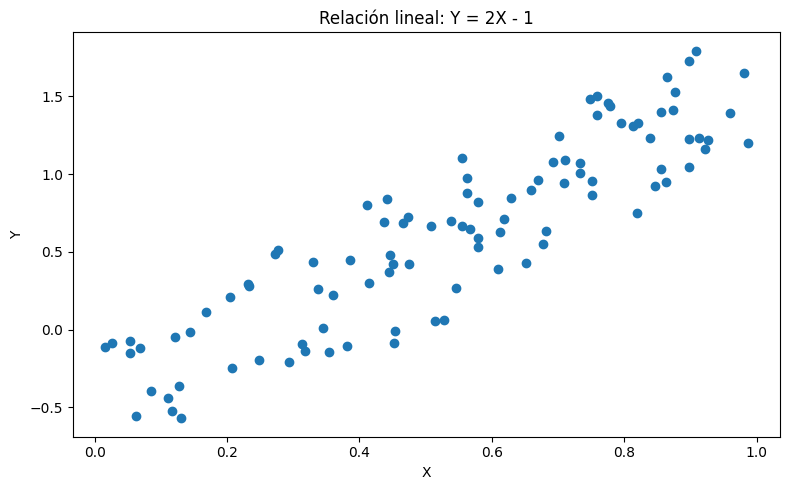

In [2]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8, 5))    
plt.scatter(X,Y)
plt.title('Relación lineal: Y = 2X - 1')
plt.xlabel('X')
plt.ylabel('Y')
plt.tight_layout()
plt.show()

Ahora ajusto el modelo usando PyMC:

In [3]:
import pymc as pm

with pm.Model() as model:

    # Defino los priors
    B0 = pm.Normal('B0', mu=0, sigma=10)
    B1 = pm.Normal('B1', mu=0, sigma=10)
    mu = B0 + B1*X
    sigma = pm.HalfNormal('sigma', sigma=1)
    
    # Defino la likelihood
    Y_obs = pm.Normal('Y_obs', mu=mu, sigma=sigma, observed=Y)
    
    # Obtengo las muestras de la posterior
    idata = pm.sample(1000)

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [B0, B1, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 122 seconds.


Analizo los resultados:

In [4]:
pm.summary(idata)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
B0,-0.440,0.062,-0.554,-0.318,0.002,0.001,1493.0,1466.0,1.0
B1,1.978,0.104,1.784,2.172,0.003,0.002,1460.0,1557.0,1.0
sigma,0.274,0.020,0.235,0.310,0.000,0.000,2107.0,1841.0,1.0


Y ahora armo gráficos de la posterior de los parámetros de la regresión:

<Figure size 800x500 with 0 Axes>

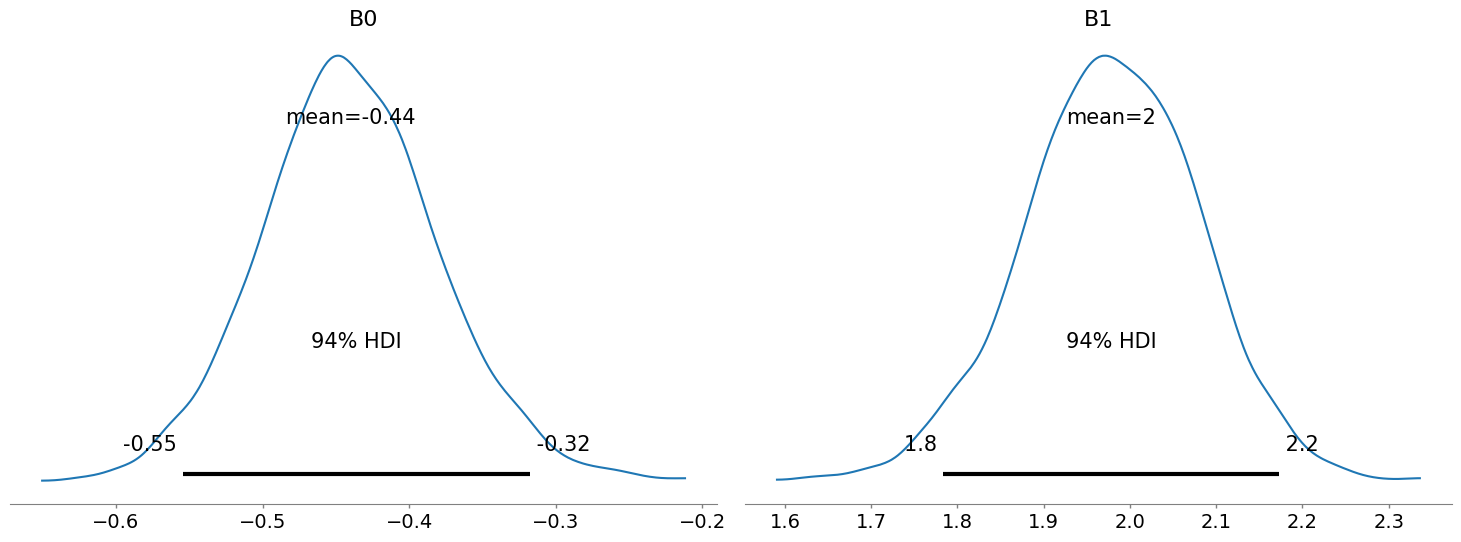

In [5]:
plt.figure(figsize=(8, 5))
pm.plot_posterior(idata, var_names=['B0', 'B1'])
plt.tight_layout()
plt.show()

## b)
¿Cuál es el valor que estimamos que tenga 𝑓 (1/2)? ¿Con qué error?

### Desarrollo

Para responder este inciso, tendré que usar la posterior predictive:

In [7]:
import numpy as np

with model:
    posterior_predictivo = pm.sample_posterior_predictive(idata, var_names=["B0", "B1", "sigma"])

Sampling: [B0, B1, sigma]


Output()

Y ahora calculo el valor esperado de **f(1/2)** según el modelo y su error:

In [9]:
# Defino un arreglo que tenga el valor de X para el cual quiero hacer la predicción
X_nuevo = np.array([1/2])

# Ver que replico la relación de las variables para la predicción
predicciones = posterior_predictivo.posterior_predictive['B0'].values[0] + posterior_predictivo.posterior_predictive['B1'].values[0] * X_nuevo[0]

media_prediccion = np.mean(predicciones)
desviacion_prediccion = np.std(predicciones)

print(f'Predicción para X = 1/2: {media_prediccion} +/- {desviacion_prediccion}')

Predicción para X = 1/2: 0.37840749267900275 +/- 10.632872371406092


## c)
Graficar y dar percentiles de la distribución de 𝛽0 + (1/2)𝛽1.

### Desarrollo

Primero armo un histograma de la distribución predicha:

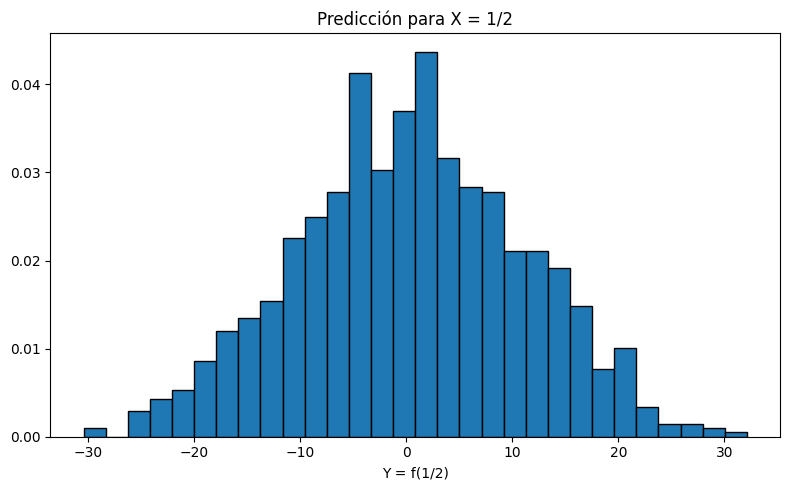

In [13]:
plt.figure(figsize=(8, 5))
plt.hist(predicciones, bins=30, density=True, edgecolor='black')
plt.title('Predicción para X = 1/2')
plt.xlabel('Y = f(1/2)')
plt.tight_layout()
plt.show()

Y finalmente muestro algunos percentiles:

In [16]:
print('Percentiles para la distribución de Y = f(1/2) predicha:')
print(f'Percentil 2.5: {np.percentile(predicciones, 2.5)}')
print(f'Percentil 50: {np.percentile(predicciones, 50)}')
print(f'Percentil 97.5: {np.percentile(predicciones, 97.5)}')

Percentiles para la distribución de Y = f(1/2) predicha:
Percentil 2.5: -20.217148569261056
Percentil 50: 0.5097772021760135
Percentil 97.5: 20.69138229206309
